In [9]:
import numpy as np
from sklearn.model_selection import ParameterSampler
import json
from sklearn.model_selection import train_test_split

In [3]:
np.random.seed(0)
param_grid = {'dropout':[0.05, 0.1,0.2,0.3], 'learning_rate':[1.e-4,1.e-3,1.e-2,1.e-1]}
param_list = list(ParameterSampler(param_grid, n_iter=5))
print(param_list)
inp_dir='/users/nchernya/HHbbgg_ETH/bregression/notebooks/json/'
for i,item in enumerate(param_list):
    with open('%s/data_%i.json'%(inp_dir,i), 'w') as f:
        json.dump(item, f)


[{'learning_rate': 0.001, 'dropout': 0.05}, {'learning_rate': 0.01, 'dropout': 0.1}, {'learning_rate': 0.0001, 'dropout': 0.2}, {'learning_rate': 0.001, 'dropout': 0.2}, {'learning_rate': 0.001, 'dropout': 0.3}]


In [4]:
X, y = np.arange(10).reshape((5, 2)), range(5)
print(X,y)

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]] range(0, 5)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=4)

In [6]:
print(X_train)
print(X_test)

[[2 3]
 [8 9]
 [4 5]]
[[0 1]
 [6 7]]


Now we would like to split in proper KFolds

In [24]:
from sklearn.model_selection import KFold
X = np.array([1, 2, 3, 4,5,6,7,8,9,10])
y = np.array([11, 21, 31, 41,51,61,71,81,91,101])
kf = KFold(n_splits=10,shuffle=True,random_state=98543)
#a = kf.get_n_splits(X)

idx = iter(kf.split(X))

for i in range(2):
    train_idx,test_idx = next(idx)
    print(i,train_idx,test_idx)
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    print(y_train,y_test)
    print('new')

0 [0 2 3 4 5 6 7 8 9] [1]
[ 11  31  41  51  61  71  81  91 101] [21]
new
1 [0 1 2 3 4 6 7 8 9] [5]
[ 11  21  31  41  51  71  81  91 101] [61]
new


In [25]:
import numpy as np
from sklearn.model_selection import ParameterSampler
import json

param_grid = {'dropout':[0.05, 0.1,0.2,0.3], 'optimizer_params':[dict(lr=1.e-03),dict(lr=0.5e-03)], 'layers':[[1024,512,256,128],[1024,512,256]] }
param_list = list(ParameterSampler(param_grid, n_iter=5))
print(param_list)
inp_dir='/users/nchernya/HHbbgg_ETH/bregression/notebooks/json/'
for i,item in enumerate(param_list):
    with open('%s/data_%i.json'%(inp_dir,i), 'w') as f:
        json.dump(item, f)


[{'layers': [1024, 512, 256], 'dropout': 0.2, 'optimizer_params': {'lr': 0.0005}}, {'layers': [1024, 512, 256, 128], 'dropout': 0.2, 'optimizer_params': {'lr': 0.001}}, {'layers': [1024, 512, 256, 128], 'dropout': 0.05, 'optimizer_params': {'lr': 0.0005}}, {'layers': [1024, 512, 256, 128], 'dropout': 0.1, 'optimizer_params': {'lr': 0.0005}}, {'layers': [1024, 512, 256], 'dropout': 0.1, 'optimizer_params': {'lr': 0.001}}]


In [26]:
import datetime

In [40]:
now = datetime.datetime.now()
print(str(now))
hour = str(now).split(' ')[0] +'_'+ str(now).split(' ')[1].split('.')[0].replace(':','_')
print(hour)

2018-02-02 17:44:18.761930
2018-02-02_17_44_18


In [10]:
import pandas as pd

In [43]:
data_old= pd.read_hdf('/users/nchernya/HHbbgg_ETH/bregression/output_root/applied_res_HybridRaw_ttbar_RegressionPerJet_heppy_energyRings3_forTesting.hd5',columns=None)

In [44]:
data_new = pd.read_hdf('/scratch/snx3000/nchernya/bregression/output_root/applied_res_2018-02-06_ttbar_RegressionPerJet_heppy_energyRings3_forTesting.hd5',columns=None)

In [45]:
data_old

,Jet_pt,Jet_eta,Jet_mcFlavour,Jet_mcPt,rho,Jet_mt,Jet_leadTrackPt,Jet_leptonPtRel,Jet_leptonDeltaR,Jet_neHEF,...,Jet_energyRing_dR2_ch_Jet_rawEnergy,Jet_energyRing_dR3_ch_Jet_rawEnergy,Jet_energyRing_dR4_ch_Jet_rawEnergy,Jet_energyRing_dR0_mu_Jet_rawEnergy,Jet_energyRing_dR1_mu_Jet_rawEnergy,Jet_energyRing_dR2_mu_Jet_rawEnergy,Jet_energyRing_dR3_mu_Jet_rawEnergy,Jet_energyRing_dR4_mu_Jet_rawEnergy,Jet_pt_reg_NN_HybridLossRaw,Jet_resolution_NN_HybridLossRaw
2,45.198471,0.318485,-5.0,58.013512,10.793257,45.713036,13.171875,0.000000,0.000000,0.105426,...,0.444669,0.010134,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.117391,0.128893
7,149.318420,0.083877,-5.0,145.569611,11.055269,150.478485,35.718750,0.000000,0.000000,0.000000,...,0.021137,0.005701,0.056085,0.000000,0.000000,0.0,0.0,0.0,1.057194,0.061477
9,23.956072,-1.617229,5.0,28.390898,11.055269,24.640070,4.683594,0.000000,0.000000,0.121276,...,0.183837,0.096262,0.123598,0.000000,0.000000,0.0,0.0,0.0,1.264870,0.180294
13,43.898132,-0.889757,-5.0,44.014038,11.593789,44.674957,17.625000,0.000000,0.000000,0.000000,...,0.434013,0.031095,0.112925,0.000000,0.000000,0.0,0.0,0.0,1.119015,0.115200
16,37.719597,0.184540,5.0,35.393833,11.593789,38.366592,9.281250,0.000000,0.000000,0.039963,...,0.069801,0.080366,0.007184,0.000000,0.000000,0.0,0.0,0.0,1.080711,0.114363
17,63.657665,-0.285869,-5.0,63.716873,7.789865,64.410568,30.312500,0.000000,0.000000,0.139603,...,0.222843,0.006462,0.010115,0.000000,0.000000,0.0,0.0,0.0,0.970296,0.083829
20,36.974663,1.401778,5.0,53.278366,7.789865,37.714142,2.296875,0.000000,0.000000,0.195182,...,0.000000,0.096730,0.074424,0.000000,0.000000,0.0,0.0,0.0,1.413137,0.171983
23,159.115295,0.664851,-5.0,174.239899,26.681253,159.610962,26.625000,1.052778,0.099289,0.318035,...,0.016058,0.005915,0.000000,0.000000,0.066848,0.0,0.0,0.0,1.125453,0.091174
25,72.964050,-0.610279,5.0,72.635796,26.681253,74.178886,14.742188,0.000000,0.000000,0.016676,...,0.118224,0.034214,0.082306,0.000000,0.000000,0.0,0.0,0.0,1.003490,0.092707
27,115.250824,-1.346367,5.0,125.530853,20.863537,116.328735,26.656250,1.252306,0.026431,0.033344,...,0.089705,0.011200,0.016186,0.000000,0.000000,0.0,0.0,0.0,1.089560,0.085157


In [46]:
data_new

,Jet_pt,Jet_eta,Jet_mcFlavour,Jet_mcPt,rho,Jet_mt,Jet_leadTrackPt,Jet_leptonPtRel,Jet_leptonDeltaR,Jet_neHEF,...,Jet_pt_reg_NN_2018-02-06_12_22_19_job31,Jet_resolution_NN_2018-02-06_12_22_19_job31,Jet_pt_reg_NN_2018-02-06_12_22_19_job28,Jet_resolution_NN_2018-02-06_12_22_19_job28,Jet_pt_reg_NN_2018-02-06_12_22_19_job37,Jet_resolution_NN_2018-02-06_12_22_19_job37,Jet_pt_reg_NN_2018-02-06_12_22_19_job23,Jet_resolution_NN_2018-02-06_12_22_19_job23,Jet_pt_reg_NN_2018-02-06_12_22_19_job40,Jet_resolution_NN_2018-02-06_12_22_19_job40
2,43.999264,0.318485,-5.0,58.013512,10.793257,44.500168,13.171875,0.000000,0.000000,0.105426,...,1.143570,0.136139,1.132951,0.138484,1.128075,0.133873,1.101998,0.126844,1.117184,0.118039
7,119.422516,0.083877,-5.0,145.569611,11.055269,120.350327,35.718750,0.000000,0.000000,0.000000,...,1.059298,0.058622,1.060587,0.061271,1.059908,0.065517,1.060276,0.064453,1.067732,0.068390
9,16.503174,-1.617229,5.0,28.390898,11.055269,16.974375,4.683594,0.000000,0.000000,0.121276,...,1.256878,0.199203,1.269054,0.205320,1.327362,0.206078,1.417882,0.234396,1.519119,0.258269
13,35.942734,-0.889757,-5.0,44.014038,11.593789,36.578781,17.625000,0.000000,0.000000,0.000000,...,1.124204,0.111844,1.122798,0.121484,1.129207,0.127438,1.119620,0.124751,1.128139,0.129475
16,31.160013,0.184540,5.0,35.393833,11.593789,31.694494,9.281250,0.000000,0.000000,0.039963,...,1.070304,0.121019,1.064325,0.123699,1.093527,0.122406,1.077355,0.128970,1.090343,0.119854
17,52.382683,-0.285869,-5.0,63.716873,7.789865,53.002235,30.312500,0.000000,0.000000,0.139603,...,0.964118,0.080222,0.963855,0.085610,0.979641,0.082544,0.972148,0.085373,0.989643,0.079359
20,26.635040,1.401778,5.0,53.278366,7.789865,27.167728,2.296875,0.000000,0.000000,0.195182,...,1.401754,0.218261,1.447608,0.213125,1.506063,0.212698,1.542623,0.211032,1.618403,0.239518
23,152.953705,0.664851,-5.0,174.239899,26.681253,153.430176,26.625000,1.052778,0.099289,0.318035,...,1.116713,0.089957,1.121741,0.093232,1.105866,0.085754,1.117746,0.087405,1.116712,0.091170
25,80.449417,-0.610279,5.0,72.635796,26.681253,81.788895,14.742188,0.000000,0.000000,0.016676,...,1.007077,0.086092,1.008075,0.081338,1.011559,0.087573,1.002109,0.086066,1.014451,0.083033
27,74.424263,-1.346367,5.0,125.530853,20.863537,75.120338,26.656250,1.252306,0.026431,0.033344,...,1.097474,0.081823,1.084743,0.081000,1.084104,0.086663,1.077089,0.087736,1.090424,0.096649


In [47]:
data_old2 = pd.read_hdf('/users/nchernya/HHbbgg_ETH/bregression/output_root/applied_res_HybridRawEnergy_ttbar_RegressionPerJet_heppy_energyRings3_forTesting.hd5',columns=None)

In [48]:
data_old2

,Jet_pt,Jet_eta,Jet_mcFlavour,Jet_mcPt,rho,Jet_mt,Jet_leadTrackPt,Jet_leptonPtRel,Jet_leptonDeltaR,Jet_neHEF,...,Jet_energyRing_dR4_ch_Jet_e,Jet_energyRing_dR0_mu_Jet_e,Jet_energyRing_dR1_mu_Jet_e,Jet_energyRing_dR2_mu_Jet_e,Jet_energyRing_dR3_mu_Jet_e,Jet_energyRing_dR4_mu_Jet_e,Jet_numDaughters_pt03,Jet_pt_reg,Jet_pt_reg_NN_HybridLossRawEnergy2,Jet_resolution_NN_HybridLossRawEnergy2
2,45.503349,0.318485,-5.0,58.013512,10.793257,46.021381,13.171875,0.000000,0.000000,0.105426,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,16,54.975937,1.110793,0.135298
7,157.895660,0.083877,-5.0,145.569611,11.055269,159.122345,35.718750,0.000000,0.000000,0.000000,...,0.053038,0.000000,0.000000,0.0,0.0,0.0,26,167.813232,1.001901,0.061685
9,26.295271,-1.617229,5.0,28.390898,11.055269,27.046057,4.683594,0.000000,0.000000,0.121276,...,0.112602,0.000000,0.000000,0.0,0.0,0.0,21,30.099846,1.181401,0.189783
13,46.148201,-0.889757,-5.0,44.014038,11.593789,46.964844,17.625000,0.000000,0.000000,0.000000,...,0.107419,0.000000,0.000000,0.0,0.0,0.0,17,50.018211,1.087786,0.129040
16,39.564838,0.184540,5.0,35.393833,11.593789,40.243484,9.281250,0.000000,0.000000,0.039963,...,0.006849,0.000000,0.000000,0.0,0.0,0.0,18,42.117550,1.036369,0.114357
17,66.836922,-0.285869,-5.0,63.716873,7.789865,67.627426,30.312500,0.000000,0.000000,0.139603,...,0.009634,0.000000,0.000000,0.0,0.0,0.0,19,63.424656,0.939979,0.082583
20,40.134415,1.401778,5.0,53.278366,7.789865,40.937088,2.296875,0.000000,0.000000,0.195182,...,0.068564,0.000000,0.000000,0.0,0.0,0.0,30,49.478447,1.327055,0.186420
23,160.694092,0.664851,-5.0,174.239899,26.681253,161.194672,26.625000,1.052778,0.099289,0.318035,...,0.000000,0.000000,0.066192,0.0,0.0,0.0,21,174.024139,1.084529,0.090968
25,71.204170,-0.610279,5.0,72.635796,26.681253,72.389702,14.742188,0.000000,0.000000,0.016676,...,0.084340,0.000000,0.000000,0.0,0.0,0.0,34,75.842216,1.032306,0.102588
27,128.566086,-1.346367,5.0,125.530853,20.863537,129.768524,26.656250,1.252306,0.026431,0.033344,...,0.014510,0.000000,0.000000,0.0,0.0,0.0,30,133.422104,0.947140,0.074734


In [51]:
data_true=pd.read_hdf('/users/nchernya/HHbbgg_ETH/root_files/ttbar_RegressionPerJet_heppy_energyRings3_forTesting.hd5',columns=None)

In [52]:
data_true

,Jet_pt,Jet_eta,Jet_mcFlavour,Jet_mcPt,rho,Jet_mt,Jet_leadTrackPt,Jet_leptonPtRel,Jet_leptonDeltaR,Jet_neHEF,...,Jet_energyRing_dR0_ch_Jet_rawEnergy,Jet_energyRing_dR1_ch_Jet_rawEnergy,Jet_energyRing_dR2_ch_Jet_rawEnergy,Jet_energyRing_dR3_ch_Jet_rawEnergy,Jet_energyRing_dR4_ch_Jet_rawEnergy,Jet_energyRing_dR0_mu_Jet_rawEnergy,Jet_energyRing_dR1_mu_Jet_rawEnergy,Jet_energyRing_dR2_mu_Jet_rawEnergy,Jet_energyRing_dR3_mu_Jet_rawEnergy,Jet_energyRing_dR4_mu_Jet_rawEnergy
2,45.503349,0.318485,-5.0,58.013512,10.793257,46.021381,13.171875,0.000000,0.000000,0.105426,...,0.000000,0.171500,0.444669,0.010134,0.000000,0.000000,0.000000,0.0,0.0,0.0
7,157.895660,0.083877,-5.0,145.569611,11.055269,159.122345,35.718750,0.000000,0.000000,0.000000,...,0.376427,0.256639,0.021137,0.005701,0.056085,0.000000,0.000000,0.0,0.0,0.0
9,26.295271,-1.617229,5.0,28.390898,11.055269,27.046057,4.683594,0.000000,0.000000,0.121276,...,0.083921,0.237655,0.183837,0.096262,0.123598,0.000000,0.000000,0.0,0.0,0.0
13,46.148201,-0.889757,-5.0,44.014038,11.593789,46.964844,17.625000,0.000000,0.000000,0.000000,...,0.000000,0.196178,0.434013,0.031095,0.112925,0.000000,0.000000,0.0,0.0,0.0
16,39.564838,0.184540,5.0,35.393833,11.593789,40.243484,9.281250,0.000000,0.000000,0.039963,...,0.563547,0.000000,0.069801,0.080366,0.007184,0.000000,0.000000,0.0,0.0,0.0
17,66.836922,-0.285869,-5.0,63.716873,7.789865,67.627426,30.312500,0.000000,0.000000,0.139603,...,0.468650,0.000000,0.222843,0.006462,0.010115,0.000000,0.000000,0.0,0.0,0.0
20,40.134415,1.401778,5.0,53.278366,7.789865,40.937088,2.296875,0.000000,0.000000,0.195182,...,0.043016,0.000000,0.000000,0.096730,0.074424,0.000000,0.000000,0.0,0.0,0.0
23,160.694092,0.664851,-5.0,174.239899,26.681253,161.194672,26.625000,1.052778,0.099289,0.318035,...,0.354805,0.020897,0.016058,0.005915,0.000000,0.000000,0.066848,0.0,0.0,0.0
25,71.204170,-0.610279,5.0,72.635796,26.681253,72.389702,14.742188,0.000000,0.000000,0.016676,...,0.000000,0.384163,0.118224,0.034214,0.082306,0.000000,0.000000,0.0,0.0,0.0
27,128.566086,-1.346367,5.0,125.530853,20.863537,129.768524,26.656250,1.252306,0.026431,0.033344,...,0.426494,0.000000,0.089705,0.011200,0.016186,0.000000,0.000000,0.0,0.0,0.0


In [63]:
print(data_true.get_value(2,'Jet_pt'))
print(data_true.get_value(2,'Jet_e'))
print(data_true.get_value(2,'Jet_rawEnergy'))
factor =data_true.get_value(2,'Jet_rawEnergy')/ data_true.get_value(2,'Jet_e')
print(factor*data_true.get_value(2,'Jet_pt'))

45.5033
48.3238
48
45.1984738929


In [64]:
data_true['Jet_rawEnergy']

2           48
7          151
9           63
13          63
16          39
17          67
20          80
23         196
25          88
27         237
33          37
37         382
38         156
43         108
45         184
47          58
48          56
53         274
54         189
59          65
65          80
66          96
74         340
81          68
85         158
87          52
88         161
91         355
92         218
96         135
          ... 
1833328     50
1833332     78
1833333     94
1833335     61
1833343     89
1833347    120
1833350    106
1833353     71
1833356     27
1833359    210
1833361     46
1833365    297
1833367    212
1833373     44
1833376     48
1833379     67
1833380     94
1833385    659
1833387    148
1833395     61
1833398    111
1833400     69
1833411     52
1833413     25
1833418     71
1833422     44
1833423    139
1833424    126
1833431    198
1833434     50
Name: Jet_rawEnergy, Length: 488505, dtype: int32

In [66]:
zh_data=pd.read_hdf('/users/nchernya/HHbbgg_ETH/root_files/ZHbbll_RegressionPerJet_heppy_energyRings3_forTraining_LargeAll3.hd5',columns=None)

In [67]:
zh_data['Jet_rawEnergy']

0          200.144836
2          136.527344
5           60.974110
8           94.700386
9           72.564568
13         208.703018
14          22.829849
16          87.114159
18          40.541550
19          62.013443
20         163.495300
22         237.265335
23          50.324631
26          53.314453
27          47.860931
33          86.785538
37         111.650162
41         171.885391
42          44.664619
43          59.491924
44         140.649765
48         217.422180
52        1403.791504
53         227.358719
55         536.837463
56         189.756561
57         481.600922
58         115.051819
63          42.181431
66         262.409637
             ...     
872886     235.908447
872888      79.296524
872891      99.823334
872892      89.343559
872894      68.175919
872899     123.923096
872900      35.308933
872901     113.082817
872902      61.773861
872903     192.638519
872904      30.023113
872905     170.171661
872909     114.631447
872911     358.245941
872915    

In [68]:
test = '19_20_job20'
test2 = test.split('job')[1]

In [69]:
print(test2)

20


In [95]:
names=['-','a','b','c']
values=['sigma',1,2,3]
data = pd.DataFrame()

In [100]:
d = []
d.append(([values[i] for i in range(len(names))]))
data = pd.DataFrame(d, columns=(names))


ValueError: No group keys passed!

In [101]:
a = 4.1111111

In [104]:
b = round(a,1)

In [105]:
print(b)

4.1


In [108]:
file = '/users/nchernya/HHbbgg_ETH/bregression/plots/money_plots_NN_2018-02-06_only2/ZHbbll/data_sigmamu_pt.json'
file2='/users/nchernya/HHbbgg_ETH/bregression/plots/money_plots_NN_2018-02-06_only2/ZHbbll/data_sigmamu_eta.json'

data = pd.read_csv(file)
data2 = pd.read_csv(file2)

In [109]:
data.head()

,Unnamed: 0,(Jet_mcPt>0),(Jet_mcPt<60),(Jet_mcPt>=60 & Jet_mcPt<100),(Jet_mcPt>=100 & Jet_mcPt<150),(Jet_mcPt>=150 & Jet_mcPt<200),(Jet_mcPt>=200 & Jet_mcPt<250),(Jet_mcPt>=250 & Jet_mcPt<300),(Jet_mcPt>=300 & Jet_mcPt<400),(Jet_mcPt>=400 & Jet_mcPt<600),(Jet_mcPt>=600)
0,0,0.122,0.187,0.181,0.165,0.113,0.12,0.119,0.045,0.09,0.069


In [110]:
data2.head()

,Unnamed: 0,|Jet_eta|<0.5,|Jet_eta|>=0.5 & |Jet_eta|<1.0,|Jet_eta|>=1.0 & |Jet_eta|<1.5,|Jet_eta|>=1.5 & |Jet_eta|<2.0,|Jet_eta|>=2.0
0,0,0.056,0.062,0.096,0.076,0.053


In [4]:
s = np.random.uniform(0,1,10)

In [5]:
print(s)

[ 0.44630117  0.17301815  0.98279715  0.48632084  0.53237928  0.0596702
  0.05739674  0.2103017   0.14050662  0.27578732]


In [6]:
a = np.random.uniform(0,1,10)
print(a)

[ 0.27698313  0.167837    0.8692802   0.29747169  0.97662098  0.33748736
  0.42299059  0.84876353  0.53544081  0.59473806]


In [77]:
import ROOT
from ROOT import TH1F
from ROOT import TFile

In [78]:
path = '/scratch/snx3000/nchernya/bregression/unweighting_hist.root'
file = TFile(path,'r')

In [79]:
th1f = file.Get('hist_ratio')

In [80]:
th1f.Draw()
bins = []
values = []
for i in range (1,th1f.GetNbinsX()+1):
    bins.append(th1f.GetBinLowEdge(i))
    values.append(th1f.GetBinContent(i))
    if i>1 and th1f.GetBinContent(i)==1 : break
bins.append(7000)
values.append(1.0)

In [81]:
print(bins)
print(values)
x = [135,137,150,167,176,400,390,6000]
inds = np.digitize(x, bins)
print(inds)
print([values[k-1] for k in inds])
print(len(bins))
print(len(values))

[0.0, 15.0, 30.0, 45.0, 60.0, 75.0, 90.0, 105.0, 120.0, 135.0, 150.0, 165.0, 180.0, 195.0, 210.0, 225.0, 240.0, 255.0, 270.0, 285.0, 300.0, 315.0, 330.0, 345.0, 360.0, 375.0, 390.0, 7000]
[1.0, 0.027116047218441963, 0.027116047218441963, 0.027116047218441963, 0.02778358943760395, 0.031314294785261154, 0.03729536384344101, 0.04633605107665062, 0.05940119922161102, 0.07630729675292969, 0.0977158173918724, 0.12466542422771454, 0.15830807387828827, 0.1974170058965683, 0.23998716473579407, 0.2937752306461334, 0.34717562794685364, 0.40635794401168823, 0.4672692120075226, 0.5387963652610779, 0.610742449760437, 0.6810606122016907, 0.7526654005050659, 0.7956656813621521, 0.8855708241462708, 0.9299582242965698, 1.0, 1.0]
[10 10 11 12 12 27 27 27]
[0.07630729675292969, 0.07630729675292969, 0.0977158173918724, 0.12466542422771454, 0.12466542422771454, 1.0, 1.0, 1.0]
28
28


In [84]:
#dic = {'bins' : bins,'values' : values}
#with open('/scratch/snx3000/nchernya/bregression/unweighting_data_.json', 'w') as f:
#    json.dump(dic, f)


In [85]:
testfile = '/scratch/snx3000/nchernya/bregression/output_root/applied_res_2018-03-09_ttbar_full_RegressionPerJet_heppy_energyRings_testing_morevar.hd5'
df_test = pd.read_hdf(testfile,columns=None)
df_test.shape

(1806261, 101)

In [86]:
df_test['func_value'] = [values[k-1] for k in np.digitize(df_test['Jet_pt'], bins)]

In [87]:
df_test['rdn'] = np.random.uniform(0,1,df_test.shape[0])
df_test[['rdn','func_value','Jet_pt']]
df_test.shape

(1806261, 103)

In [45]:
df_test_cut = df_test.loc[df_test['rdn'] < df_test['func_value']]

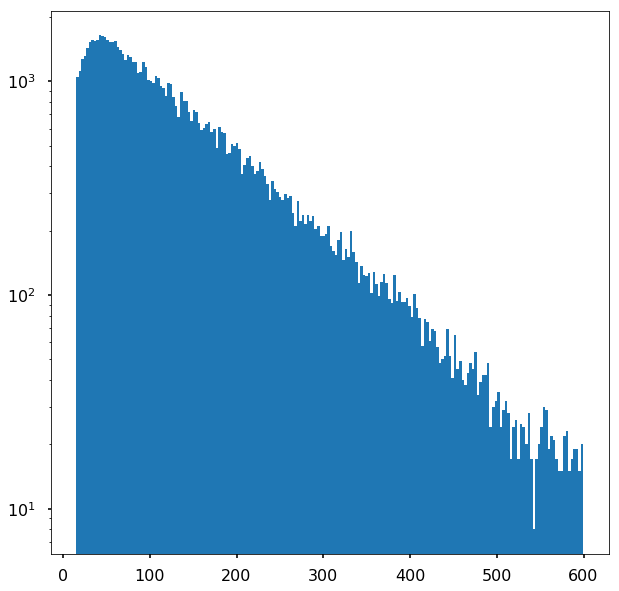

In [49]:
ax2 = plt.hist(df_test_cut.query('Jet_pt<600')['Jet_pt'],bins=200,log=True)

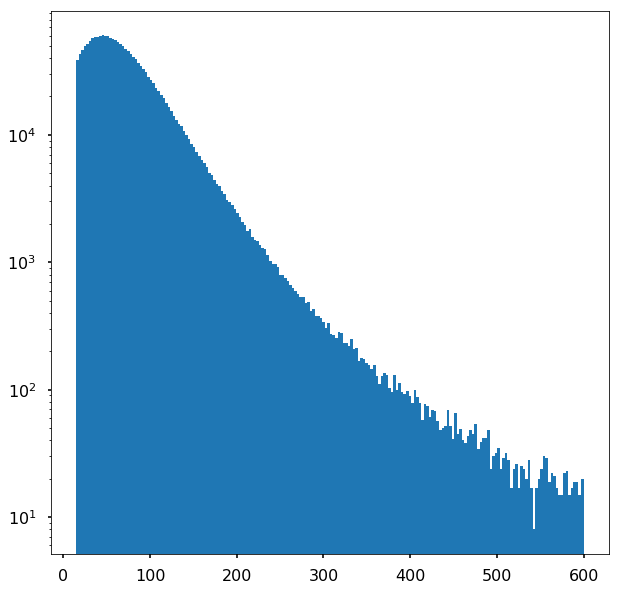

In [48]:
ax2 = plt.hist(df_test.query('Jet_pt<600')['Jet_pt'],bins=200,log=True)

In [88]:
df_test.drop(df_test[df_test.rdn > df_test.func_value].index, inplace=True)


In [89]:
df_test[['rdn','func_value','Jet_pt']]

,rdn,func_value,Jet_pt
31,0.030063,0.037295,104.265404
33,0.023045,0.027116,31.365004
41,0.009337,0.027116,28.078299
83,0.005728,0.037295,94.481079
94,0.011293,0.027116,22.136303
107,0.124563,0.158308,183.759827
136,0.004717,0.027784,72.461914
137,0.005471,0.027116,53.733990
143,0.018586,0.027116,44.036819
190,0.042051,0.059401,123.638512


In [92]:
df_test['Jet_pt'] = df_test['Jet_pt']*df_test['Jet_rawEnergy']/df_test['Jet_e']
df_test['Jet_mcPt']/=5.
df_test[['rdn','func_value','Jet_pt']]

,rdn,func_value,Jet_pt
31,0.030063,0.037295,78.832069
33,0.023045,0.027116,20.761745
41,0.009337,0.027116,34.990360
83,0.005728,0.037295,54.990974
94,0.011293,0.027116,22.699263
107,0.124563,0.158308,164.138229
136,0.004717,0.027784,60.632534
137,0.005471,0.027116,35.847645
143,0.018586,0.027116,30.195946
190,0.042051,0.059401,110.427567


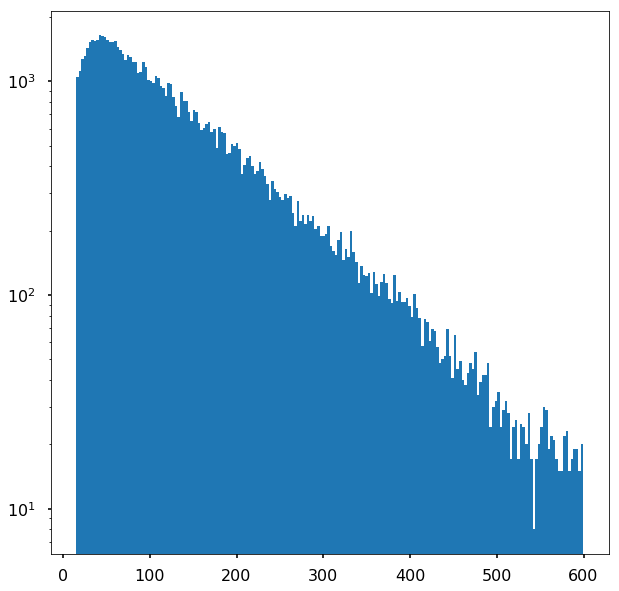

In [55]:
ax2 = plt.hist(df_test.query('Jet_pt<600')['Jet_pt'],bins=200,log=True)

In [57]:
with open('/scratch/snx3000/nchernya/bregression/unweighting_data.json' ) as fin_unweight:
     unweight_info = json.loads(fin_unweight.read())
unweight_bins = unweight_info['bins']
unweight_values = unweight_info['values']

In [60]:
print(unweight_values)

[1.0, 0.027116047218441963, 0.027116047218441963, 0.027116047218441963, 0.02778358943760395, 0.031314294785261154, 0.03729536384344101, 0.04633605107665062, 0.05940119922161102, 0.07630729675292969, 0.0977158173918724, 0.12466542422771454, 0.15830807387828827, 0.1974170058965683, 0.23998716473579407, 0.2937752306461334, 0.34717562794685364, 0.40635794401168823, 0.4672692120075226, 0.5387963652610779, 0.610742449760437, 0.6810606122016907, 0.7526654005050659, 0.7956656813621521, 0.8855708241462708, 0.9299582242965698, 1.0, 1.0]


In [61]:
df_test['Jet_pt'].max()

2133.6096

In [62]:
df_test.shape

(83115, 103)

In [68]:
83115/1806261

0.0460149446840739

In [69]:
0.05*1.e06

50000.0

In [70]:
500000/0.05

10000000.0

In [72]:
path2='/scratch/snx3000/nchernya/bregression/ttbar_data_full_7_morevar/ttbar_full_jobs_RegressionPerJet_heppy_energyRings_forTraining_con120130_morevar.hd5'
df_valid = pd.read_hdf(path2,columns=None)
df_valid.shape

(7659089, 77)

In [73]:
7659089*0.046


352318.094

In [74]:
5000000*0.05

250000.0

In [94]:
a = [1,2,3,4,5]
print(a)

[1, 2, 3, 4, 5]


In [96]:
for item in a[:3]:
    print(item)

1
2
3


In [2]:
import pandas as pd

df = pd.DataFrame([{'id': 1, 'price': 123, 'name': 'anna', 'amount': 1},
                   {'id': 1, 'price':   7, 'name': 'anna', 'amount': 2},
                   {'id': 2, 'price':  42, 'name': 'bob', 'amount': 30},
                   {'id': 3, 'price':   1, 'name': 'charlie', 'amount': 10},
                   {'id': 3, 'price':   2, 'name': 'david', 'amount': 100},
                   {'id': 1, 'price': 400, 'name': 'anna', 'amount': 1}])
print(df)

   amount  id     name  price
0       1   1     anna    123
1       2   1     anna      7
2      30   2      bob     42
3      10   3  charlie      1
4     100   3    david      2
5       1   1     anna    400


In [3]:
aggregation_functions = {'price': 'sum', 'amount': 'sum', 'name': 'first'}
df_new = df.groupby(df['id']).aggregate(aggregation_functions)

In [4]:
df_new

,name,amount,price
id,,,
1,anna,4,530
2,bob,30,42
3,charlie,110,3


In [6]:
df=pd.read_hdf('/scratch/snx3000/nchernya/bregression/ttbar_data_full_7_morevar/ZHbbll_RegressionPerJet_heppy_energyRings_forTesting_morevar.hd5',columns=None)

KeyboardInterrupt: 

In [ ]:
group_by_carrier = df.groupby(['rho','nPVs'])    

In [ ]:
#group_by_carrier.size()

In [ ]:
df = pd.DataFrame(np.arange(1,10).reshape(3,3))
arr = sparse.coo_matrix(([1,1,1], ([0,1,2], [1,2,0])), shape=(3,3))
df['newcol'] = arr.toarray().tolist()
print(df)

In [ ]:
print('test')

In [11]:
data = pd.read_hdf("/scratch/snx3000/nchernya/bregression/ttbar_data_full_7_morevar/ttbar_full_jobs_RegressionPerJet_heppy_energyRings_forTraining_con110120_morevar.hd5")

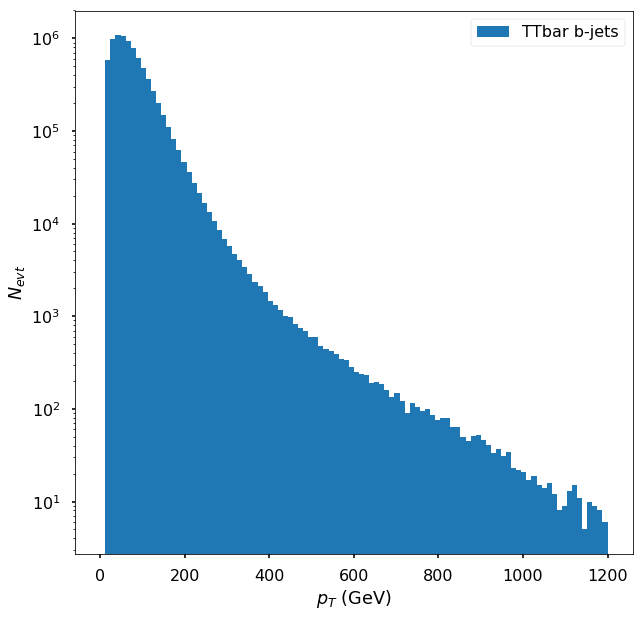

In [26]:
ax2 = plt.hist(data['Jet_pt'],bins=100,range=[0,1200],log=True,label='TTbar b-jets')
plt.xlabel('$p_T$ (GeV)')
plt.ylabel('$N_{evt}$')
plt.legend()
path='/scratch/snx3000/nchernya/bregression/plots/'
savename='bjets_pt'
plt.savefig(path+savename+'.pdf')

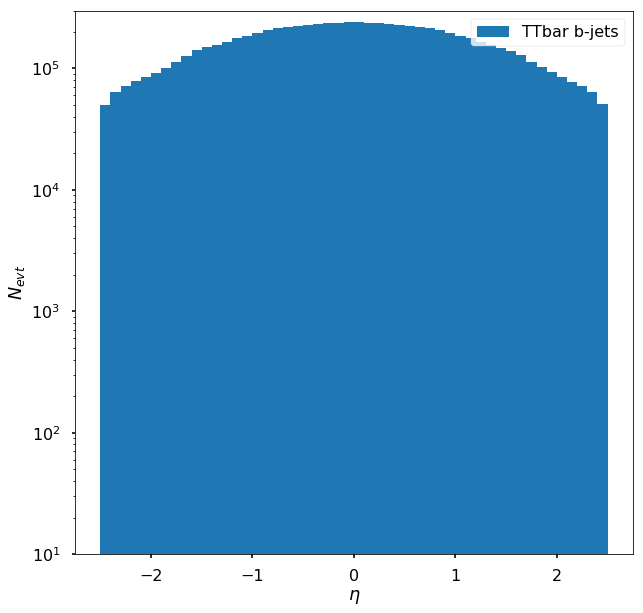

In [29]:
plt.clf()
ax3 = plt.hist(data['Jet_eta'],bins=50,range=[-2.5,2.5],log=True,label='TTbar b-jets')
axes = plt.gca()
plt.xlabel('$\eta$')
plt.ylabel('$N_{evt}$')
plt.legend()
axes.set_ylim(1e01,3e05)
path='/scratch/snx3000/nchernya/bregression/plots/'
savename='bjets_eta'
plt.savefig(path+savename+'.pdf')